In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Sklearn is a very common library that allows you to implement most basic ML algorithms.
#Train_test_split will allow us to quickly split our dataset into a training set and a test set.
from sklearn.model_selection import train_test_split

#This will allow us to evaluate our fit using the R^2 score.
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('world_tourism_economy_data.csv')

In [3]:
df.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


In [4]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      4289 non-null   float64
 4   tourism_arrivals      4949 non-null   float64
 5   tourism_exports       4114 non-null   float64
 6   tourism_departures    2589 non-null   float64
 7   tourism_expenditures  4173 non-null   float64
 8   gdp                   6424 non-null   float64
 9   inflation             5668 non-null   float64
 10  unemployment          3658 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


In [5]:
df.isnull().sum()

,0
country,0
country_code,0
year,0
tourism_receipts,2361
tourism_arrivals,1701
tourism_exports,2536
tourism_departures,4061
tourism_expenditures,2477
gdp,226
inflation,982


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,6650.000000,4.289000e+03,4.949000e+03,4114.000000,2.589000e+03,4173.000000,6.424000e+03,5668.000000,3658.000000
mean,2011.000000,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,2.089999e+12,6.319369,7.961191
std,7.211645,1.291076e+11,2.049444e+08,17.758374,2.064665e+08,4.071632,7.761985e+12,18.682769,5.802565
min,1999.000000,1.000000e+05,9.000000e+02,0.000956,2.000000e+03,0.157818,1.396473e+07,-16.859691,0.039000
25%,2005.000000,2.690000e+08,5.290000e+05,4.657732,1.051000e+06,4.074702,6.087182e+09,1.865425,4.250000
50%,2011.000000,1.553000e+09,2.508000e+06,8.306797,4.634000e+06,5.754790,3.681803e+10,3.629433,6.548000
75%,2017.000000,9.144227e+09,1.818000e+07,18.506710,4.508703e+07,7.985102,4.266977e+11,6.563197,9.894692
max,2023.000000,1.863069e+12,2.403074e+09,101.966999,2.034432e+09,28.192276,1.061717e+14,557.201817,57.000000


In [8]:
#Filling the missing values
# Forward filling the missing values in columns like tourism_receipts, tourism_arrivals, tourism_exports, tourism_departures and tourism_expenditures for time series data
df['tourism_receipts'] = df['tourism_receipts'].fillna(method = 'ffill')
df['tourism_arrivals'] = df['tourism_arrivals'].fillna(method = 'ffill')
df['tourism_exports'] = df['tourism_exports'].fillna(method='ffill')
df['tourism_departures'] = df['tourism_departures'].fillna(method='ffill')
df['tourism_expenditures'] = df['tourism_expenditures'].fillna(method='ffill')

<ipython-input-8-1af782808128>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['tourism_receipts'] = df['tourism_receipts'].fillna(method = 'ffill')
<ipython-input-8-1af782808128>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['tourism_arrivals'] = df['tourism_arrivals'].fillna(method = 'ffill')
<ipython-input-8-1af782808128>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['tourism_exports'] = df['tourism_exports'].fillna(method='ffill')
<ipython-input-8-1af782808128>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['tourism_departures'] = df['tourism_departures'].fillna(method='ffill')
<ipython-input-8-1af782808128>:7: 

In [9]:
# For other columns like tourism_departures, gdp, inflation, and unemployment, filling with the mean of the column
df['tourism_departures'] = df['tourism_departures'].fillna(df['tourism_departures'].mean())
df['gdp'] = df['gdp'].fillna(df['gdp'].mean())
df['inflation'] = df['inflation'].fillna(df['inflation'].mean())
df['unemployment'] = df['unemployment'].fillna(df['unemployment'].mean())


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      6650 non-null   float64
 4   tourism_arrivals      6650 non-null   float64
 5   tourism_exports       6650 non-null   float64
 6   tourism_departures    6650 non-null   float64
 7   tourism_expenditures  6650 non-null   float64
 8   gdp                   6650 non-null   float64
 9   inflation             6650 non-null   float64
 10  unemployment          6650 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


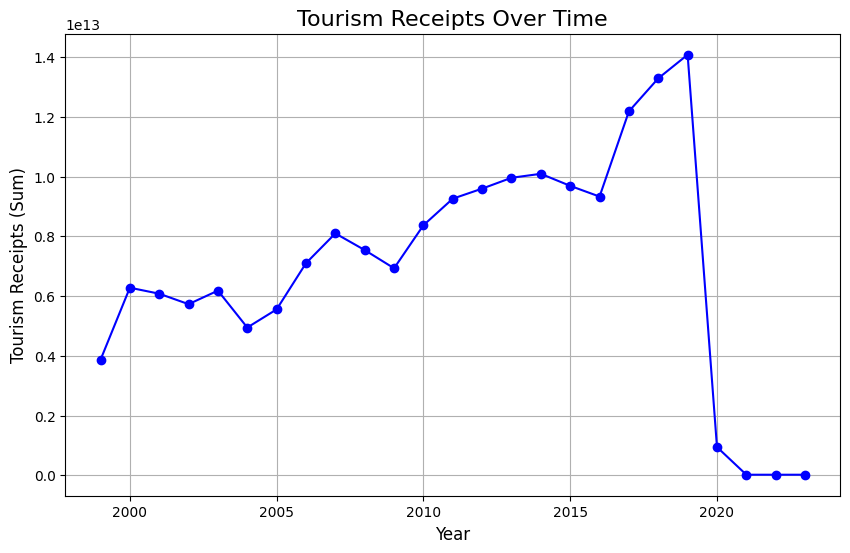

In [29]:
# Assuming 'date' is the time column and 'tourism_receipts' is the data
receipts_by_year = df.groupby('year')['tourism_receipts'].sum()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(receipts_by_year.index, receipts_by_year.values, marker='o', color='blue')
plt.title('Tourism Receipts Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tourism Receipts (Sum)', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-32-2c696c44961f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')


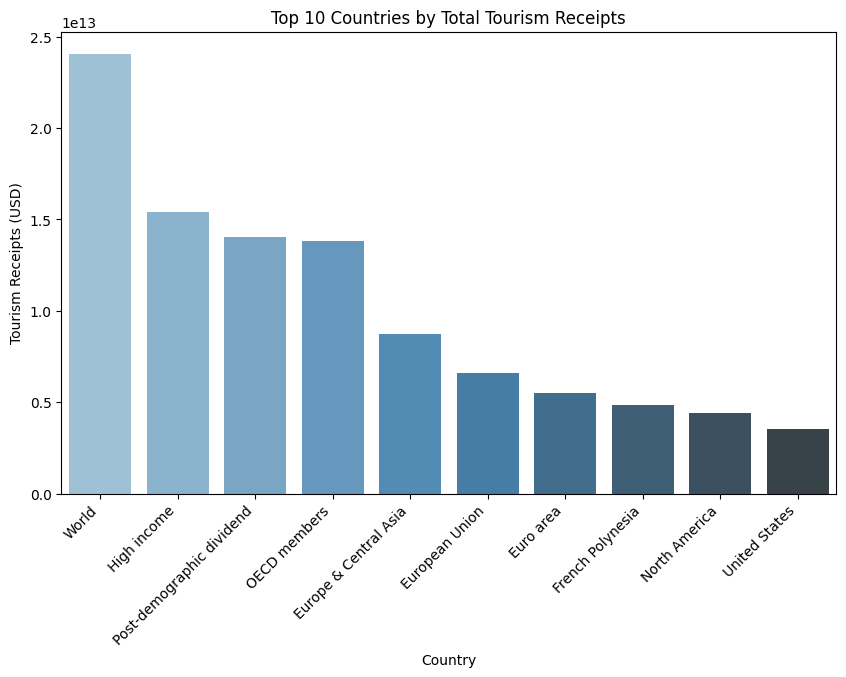

In [32]:
# Top 10 countries by tourism receipts
top_countries = df.groupby('country')['tourism_receipts'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')
plt.title('Top 10 Countries by Total Tourism Receipts')
plt.xlabel('Country')
plt.ylabel('Tourism Receipts (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-34-acb4debcbebe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_tourism_receipts.index, y=region_tourism_receipts.values, palette='coolwarm')


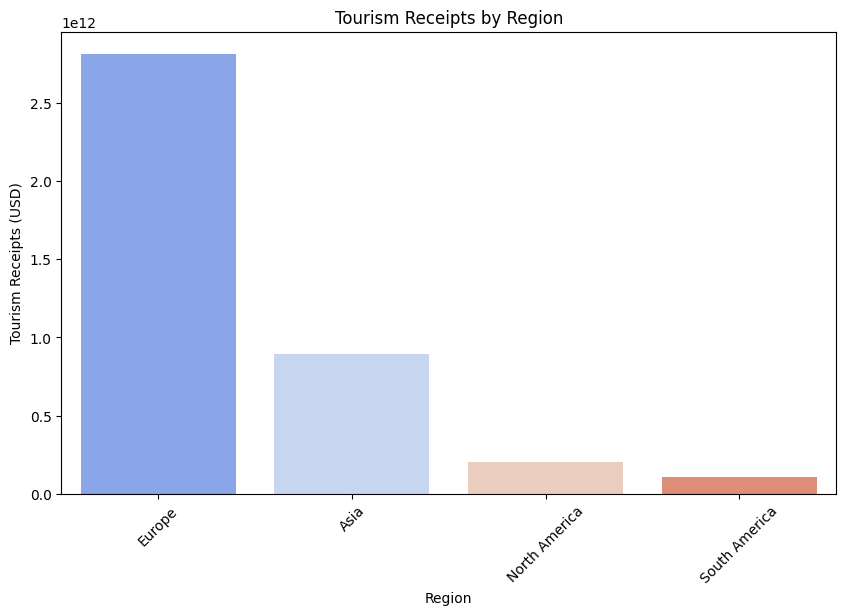

In [34]:
# Add a 'region' column manually (or use external data for countries' regions)
df['region'] = df['country'].map({
    'USA': 'North America', 'India': 'Asia', 'China': 'Asia', 'Germany': 'Europe',
    'Brazil': 'South America', 'France': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
    'UK': 'Europe', 'Canada': 'North America'  # Add more regions accordingly
})

# Aggregate data by region for tourism receipts
region_tourism_receipts = df.groupby('region')['tourism_receipts'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_tourism_receipts.index, y=region_tourism_receipts.values, palette='coolwarm')
plt.title('Tourism Receipts by Region')
plt.xlabel('Region')
plt.ylabel('Tourism Receipts (USD)')
plt.xticks(rotation=45)
plt.show()

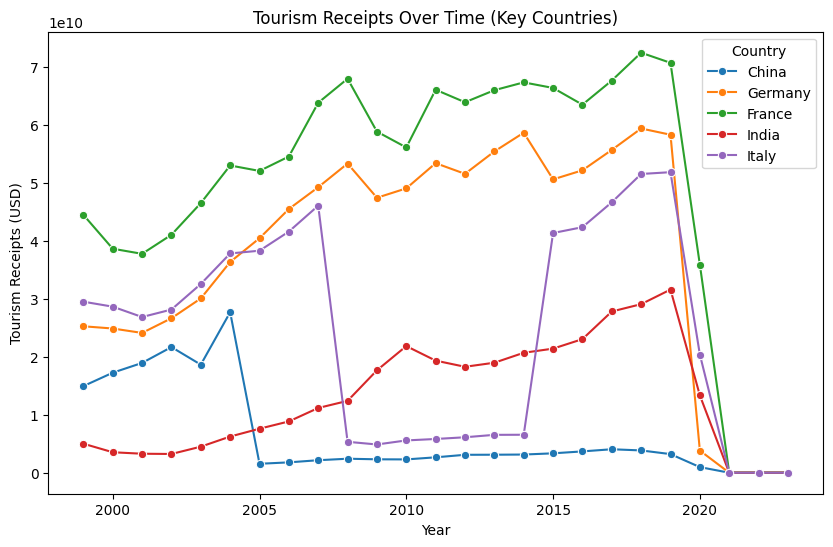

In [14]:
# Manually select a few key countries based on tourism receipts
key_countries = ['USA', 'France', 'China', 'Germany', 'India', 'Italy']

selected_data = df[df['country'].isin(key_countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=selected_data, x='year', y='tourism_receipts', hue='country', marker='o')
plt.title('Tourism Receipts Over Time (Key Countries)')
plt.xlabel('Year')
plt.ylabel('Tourism Receipts (USD)')
plt.legend(title='Country')
plt.show()


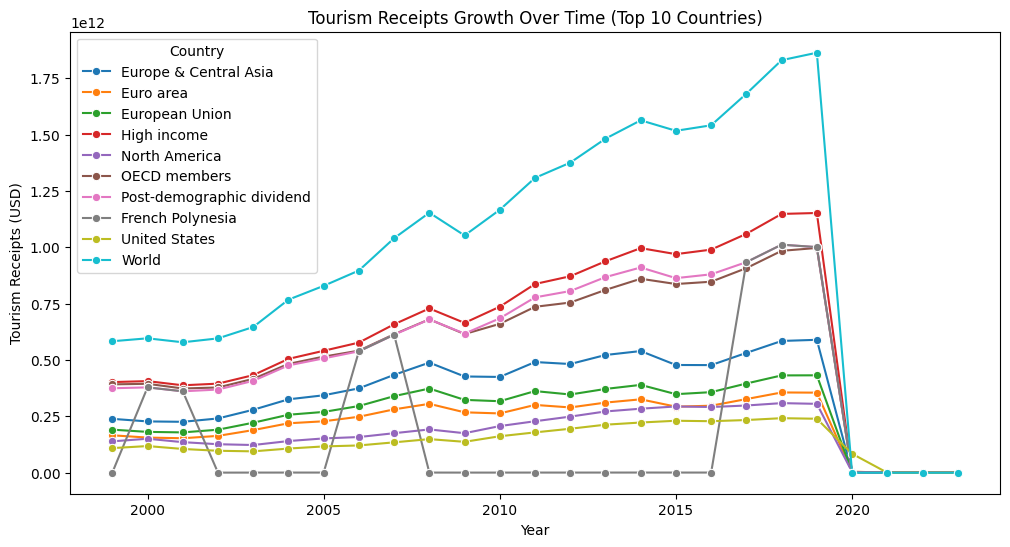

In [15]:
# Get top 10 countries by tourism receipts
top_10_countries_by_tourism = df.groupby('country')['tourism_receipts'].sum().sort_values(ascending=False).head(10)
top_10_df = df[df['country'].isin(top_10_countries_by_tourism.index)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_df, x='year', y='tourism_receipts', hue='country', marker='o')
plt.title('Tourism Receipts Growth Over Time (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Tourism Receipts (USD)')
plt.legend(title='Country')
plt.show()

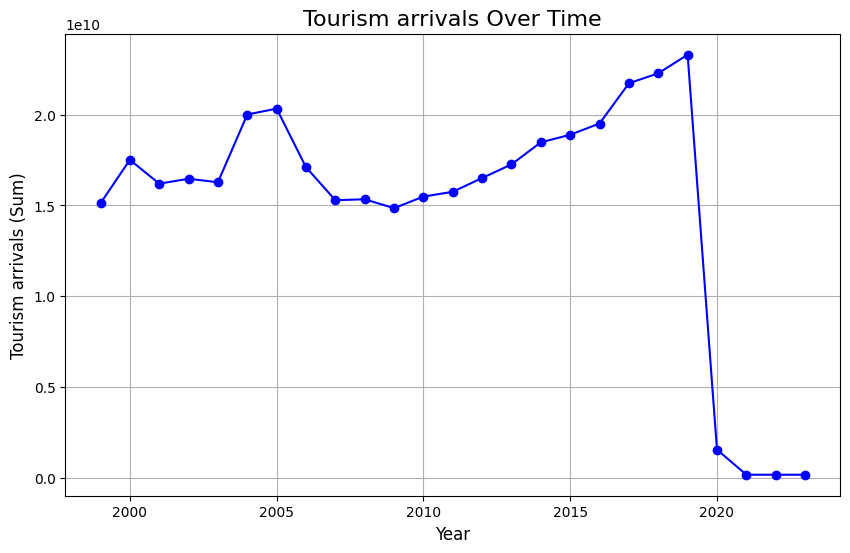

In [31]:
# Assuming 'date' is the time column and 'tourism_arrivals' is the data
arrivals_by_year = df.groupby('year')['tourism_arrivals'].sum()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(arrivals_by_year.index, arrivals_by_year.values, marker='o', color='blue')
plt.title('Tourism arrivals Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tourism arrivals (Sum)', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-33-94171f94c3d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')


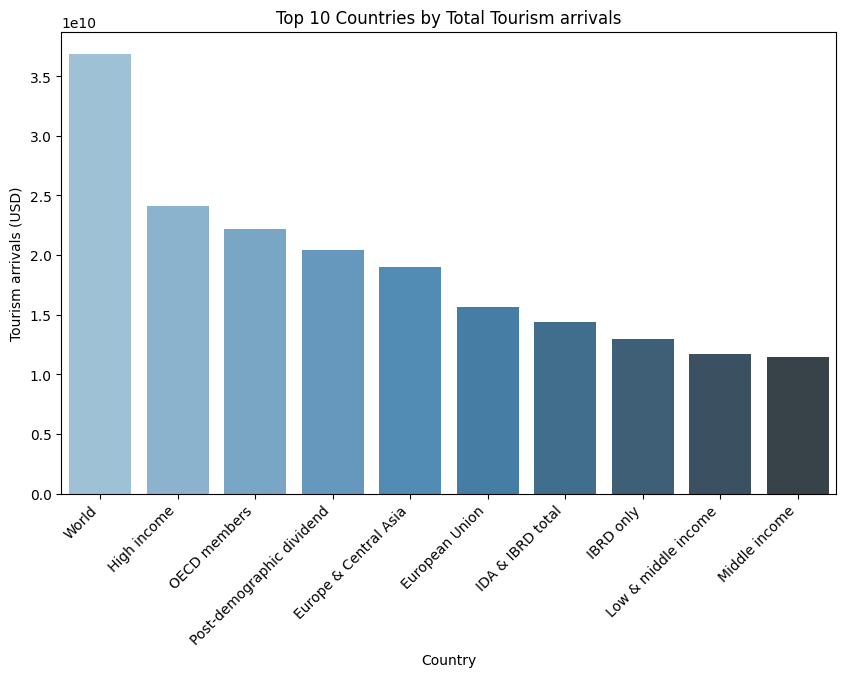

In [33]:
# Top 10 countries by tourism arrivals
top_countries = df.groupby('country')['tourism_arrivals'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')
plt.title('Top 10 Countries by Total Tourism arrivals')
plt.xlabel('Country')
plt.ylabel('Tourism arrivals (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-35-73112e1f870d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_tourism_arrivals.index, y=region_tourism_arrivals.values, palette='coolwarm')


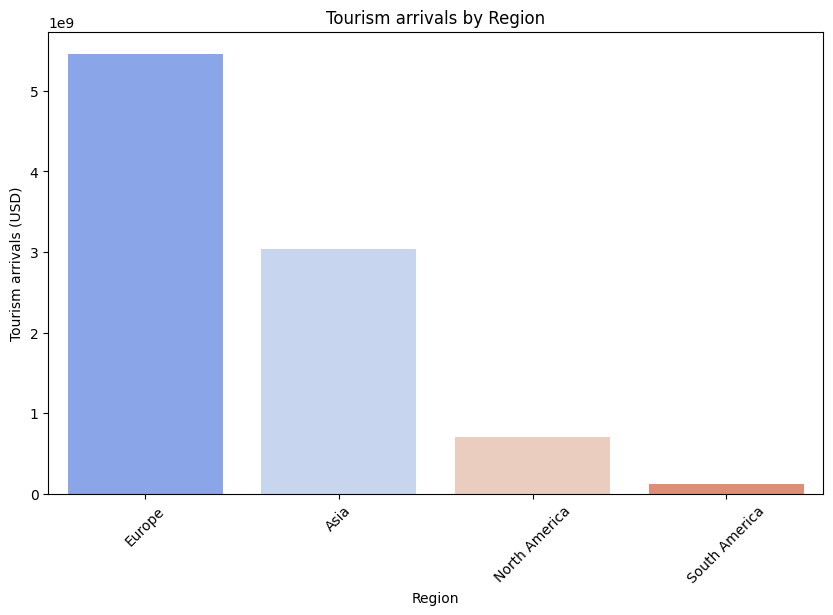

In [35]:
# Add a 'region' column manually (or use external data for countries' regions)
df['region'] = df['country'].map({
    'USA': 'North America', 'India': 'Asia', 'China': 'Asia', 'Germany': 'Europe',
    'Brazil': 'South America', 'France': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
    'UK': 'Europe', 'Canada': 'North America'  # Add more regions accordingly
})

# Aggregate data by region for tourism arrivals
region_tourism_arrivals = df.groupby('region')['tourism_arrivals'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_tourism_arrivals.index, y=region_tourism_arrivals.values, palette='coolwarm')
plt.title('Tourism arrivals by Region')
plt.xlabel('Region')
plt.ylabel('Tourism arrivals (USD)')
plt.xticks(rotation=45)
plt.show()

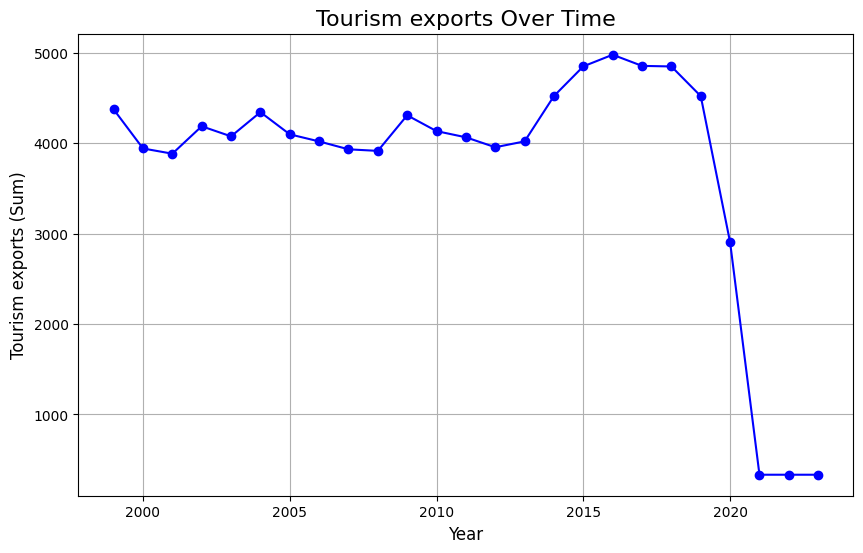

In [40]:
# Assuming 'date' is the time column and 'tourism_exports' is the data
exports_by_year = df.groupby('year')['tourism_exports'].sum()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(exports_by_year.index, exports_by_year.values, marker='o', color='blue')
plt.title('Tourism exports Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tourism exports (Sum)', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-37-604e2e36f65d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')


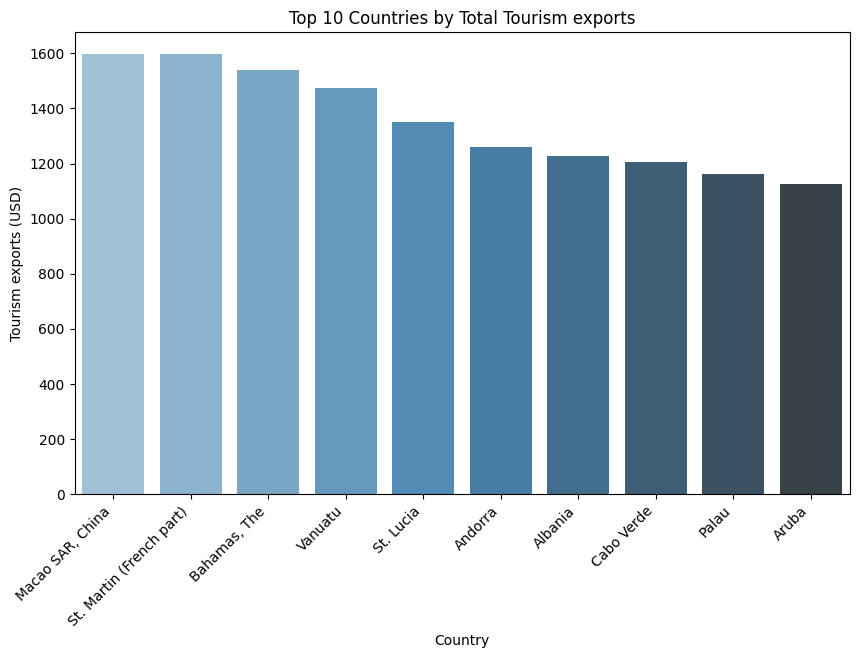

In [37]:
# Top 10 countries by tourism exports
top_countries = df.groupby('country')['tourism_exports'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')
plt.title('Top 10 Countries by Total Tourism exports')
plt.xlabel('Country')
plt.ylabel('Tourism exports (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-36-2baa8bf87d67>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_tourism_exports.index, y=region_tourism_exports.values, palette='coolwarm')


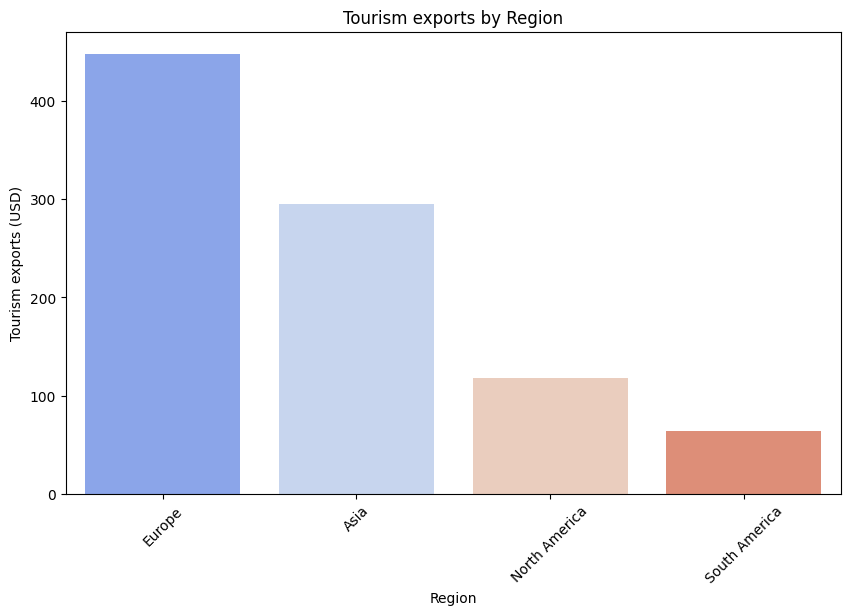

In [36]:
# Add a 'region' column manually (or use external data for countries' regions)
df['region'] = df['country'].map({
    'USA': 'North America', 'India': 'Asia', 'China': 'Asia', 'Germany': 'Europe',
    'Brazil': 'South America', 'France': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
    'UK': 'Europe', 'Canada': 'North America'  # Add more regions accordingly
})

# Aggregate data by region for tourism exports
region_tourism_exports = df.groupby('region')['tourism_exports'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_tourism_exports.index, y=region_tourism_exports.values, palette='coolwarm')
plt.title('Tourism exports by Region')
plt.xlabel('Region')
plt.ylabel('Tourism exports (USD)')
plt.xticks(rotation=45)
plt.show()

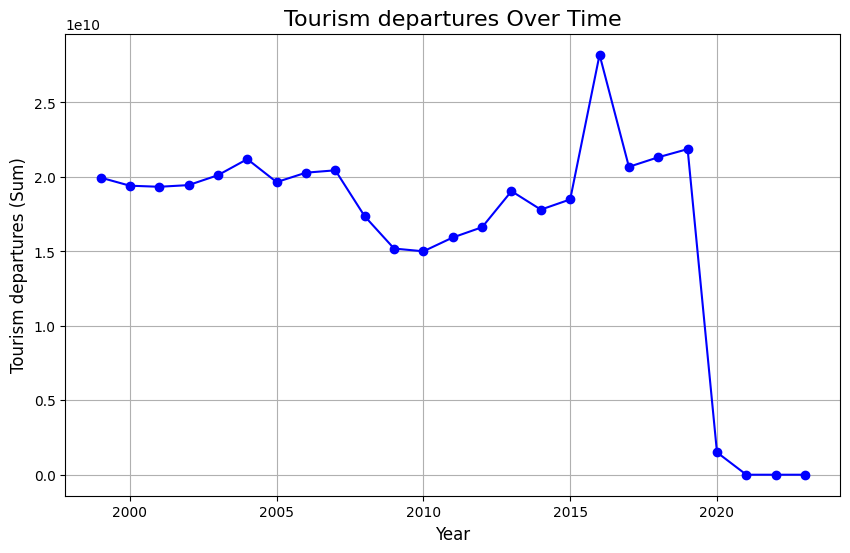

In [39]:
# Assuming 'date' is the time column and 'tourism_departures' is the data
departures_by_year = df.groupby('year')['tourism_departures'].sum()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(departures_by_year.index, departures_by_year.values, marker='o', color='blue')
plt.title('Tourism departures Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tourism departures (Sum)', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-38-cb1b27d31f38>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')


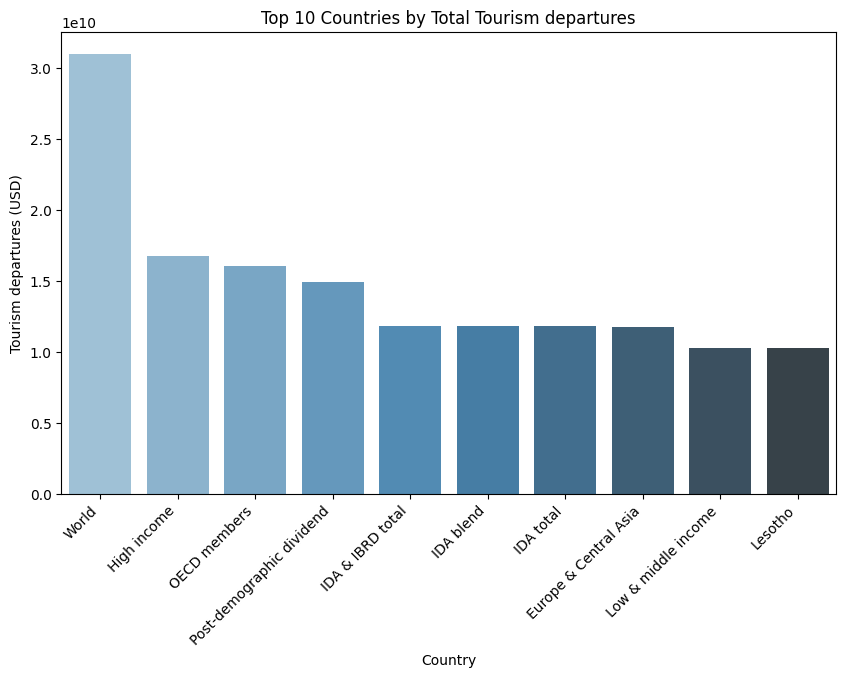

In [38]:
# Top 10 countries by tourism departures
top_countries = df.groupby('country')['tourism_departures'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')
plt.title('Top 10 Countries by Total Tourism departures')
plt.xlabel('Country')
plt.ylabel('Tourism departures (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-41-90aaaf095b84>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_tourism_departures.index, y=region_tourism_departures.values, palette='coolwarm')


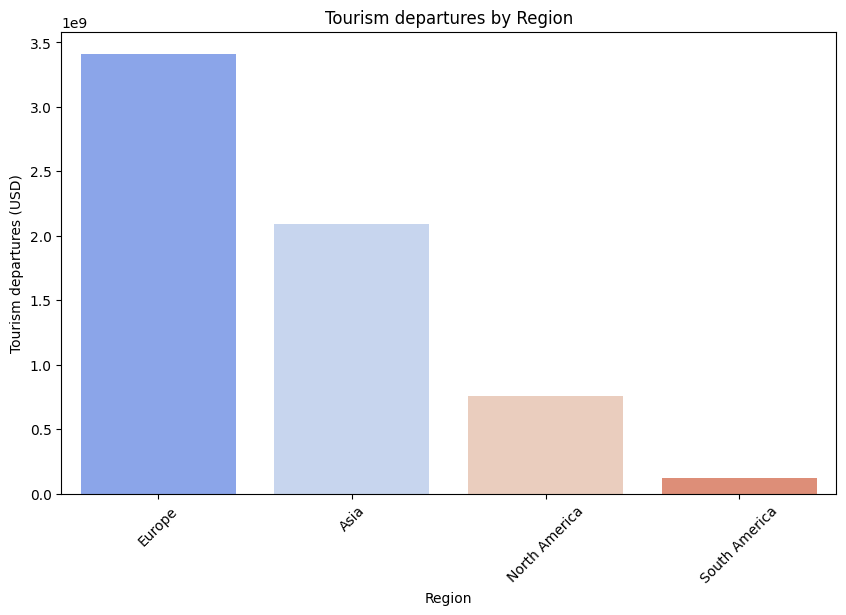

In [41]:
# Add a 'region' column manually (or use external data for countries' regions)
df['region'] = df['country'].map({
    'USA': 'North America', 'India': 'Asia', 'China': 'Asia', 'Germany': 'Europe',
    'Brazil': 'South America', 'France': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
    'UK': 'Europe', 'Canada': 'North America'  # Add more regions accordingly
})

# Aggregate data by region for tourism departures
region_tourism_departures = df.groupby('region')['tourism_departures'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_tourism_departures.index, y=region_tourism_departures.values, palette='coolwarm')
plt.title('Tourism departures by Region')
plt.xlabel('Region')
plt.ylabel('Tourism departures (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Add a 'region' column manually (or use external data for countries' regions)
df['region'] = df['country'].map({
    'USA': 'North America', 'India': 'Asia', 'China': 'Asia', 'Germany': 'Europe',
    'Brazil': 'South America', 'France': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
    'UK': 'Europe', 'Canada': 'North America'  # Add more regions accordingly
})

# Aggregate data by region for tourism arrivals
region_tourism_arrivals = df.groupby('region')['tourism_arrivals'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_tourism_arrivals.index, y=region_tourism_arrivals.values, palette='coolwarm')
plt.title('Tourism arrivals by Region')
plt.xlabel('Region')
plt.ylabel('Tourism arrivals (USD)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-b3592370485d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expenditure_unemployment.index, y=top_expenditure_unemployment.values, palette='viridis')


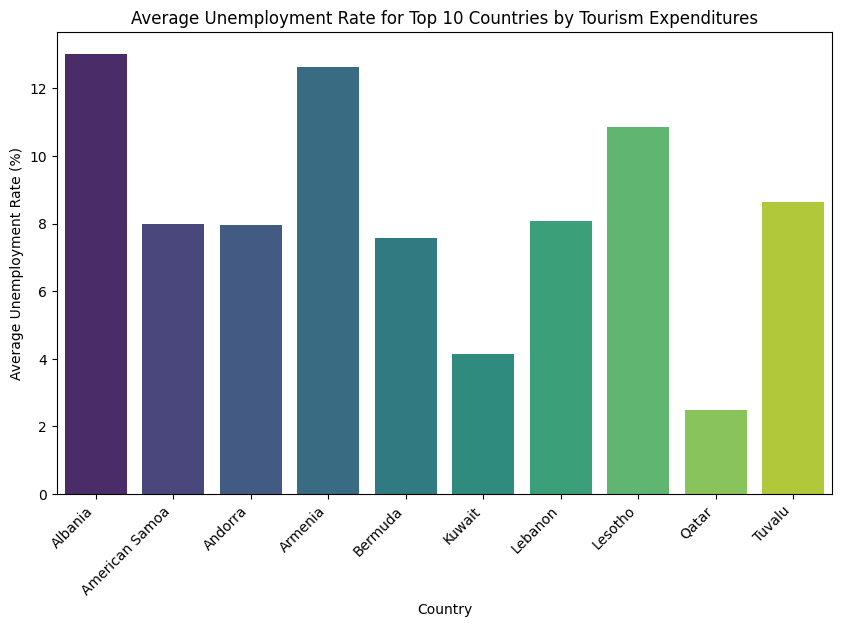

In [16]:
# Top 10 countries by tourism expenditures
top_expenditure_countries = df.groupby('country')['tourism_expenditures'].sum().sort_values(ascending=False).head(10)

# Calculate average unemployment for the top 10 countries
top_expenditure_unemployment = df[df['country'].isin(top_expenditure_countries.index)].groupby('country')['unemployment'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_expenditure_unemployment.index, y=top_expenditure_unemployment.values, palette='viridis')
plt.title('Average Unemployment Rate for Top 10 Countries by Tourism Expenditures')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-17-cc24c761ed13>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tourism_expenditure_percentage.index, y=top_tourism_expenditure_percentage.values, palette='coolwarm')


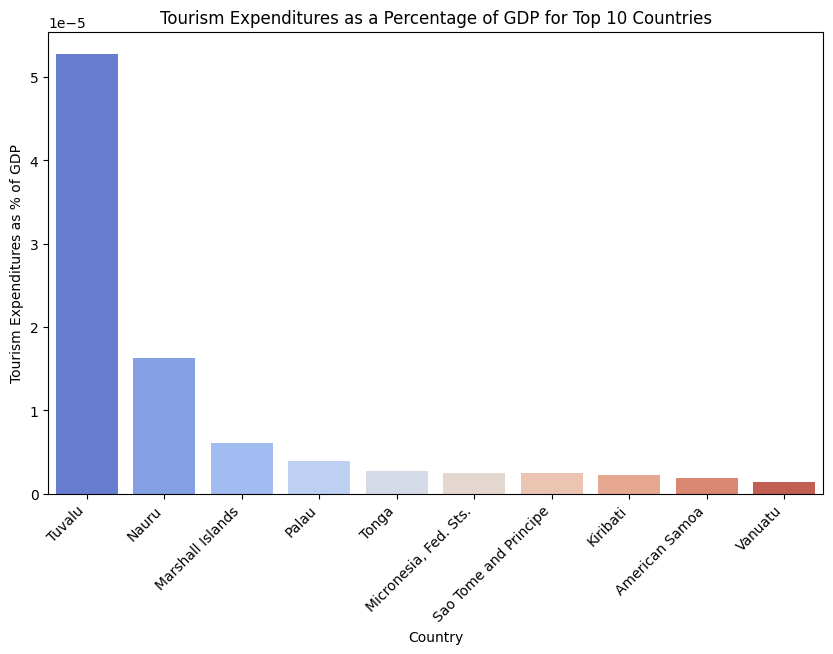

In [17]:
# Calculate tourism expenditures as a percentage of GDP
df['tourism_expenditures_percentage'] = (df['tourism_expenditures'] / df['gdp']) * 100

# Get the top 10 countries by tourism receipts
top_tourism_expenditure_percentage = df.groupby('country')['tourism_expenditures_percentage'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tourism_expenditure_percentage.index, y=top_tourism_expenditure_percentage.values, palette='coolwarm')
plt.title('Tourism Expenditures as a Percentage of GDP for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Tourism Expenditures as % of GDP')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
#set independent variable using all rows, and all columns except for the last one.
X = df[['year']]

#set the dependent variable using all rows, but ony the last column.
y = df['tourism_exports']
#y = df.iloc[:, 1]

#Lets look at our data
df

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment,region,tourism_expenditures_percentage
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,6.148733e+07,9.495387,1.722905e+09,2.280372,7.961191,NaN,5.511266e-07
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,6.148733e+07,7.760536,2.654293e+11,7.819865,7.961191,NaN,2.923768e-09
2,Afghanistan,AFG,1999,8.034209e+09,1.530938e+07,12.204030,6.148733e+07,7.760536,2.089999e+12,6.319369,7.961191,NaN,3.713176e-10
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,6.148733e+07,6.147291,1.394683e+11,0.372266,7.961191,NaN,4.407661e-09
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,6.148733e+07,2.489638,6.152923e+09,248.195902,7.961191,NaN,4.046269e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,6.600000e+07,6.390000e+05,1.253967,1.850000e+04,2.860109,1.046822e+10,4.944324,7.961191,NaN,2.732183e-08
6646,"Yemen, Rep.",YEM,2023,6.600000e+07,6.390000e+05,1.253967,1.850000e+04,2.860109,2.089999e+12,6.319369,7.961191,NaN,1.368473e-10
6647,South Africa,ZAF,2023,6.600000e+07,6.390000e+05,1.253967,1.850000e+04,2.860109,3.806993e+11,6.073909,32.098000,NaN,7.512777e-10
6648,Zambia,ZMB,2023,6.600000e+07,6.390000e+05,1.253967,1.850000e+04,2.860109,2.757796e+10,10.884532,7.961191,NaN,1.037100e-08


In [19]:
#This will create x and y variables for training and test sets.
#Here we are using 25% of our examples for the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train

,year
847,2002
1442,2004
333,2000
3025,2010
690,2001
...,...
4931,2017
3264,2011
1653,2005
2607,2008


In [20]:
#this sets the object regressor to the class of LinearRegression from the Sklearn library.
LR = LinearRegression()

#this fits the model to our training data.
LR.fit(X_train, y_train)

LinearRegression()

In [21]:
#Predict on our test set.
y_pred = LR.predict(X_test)

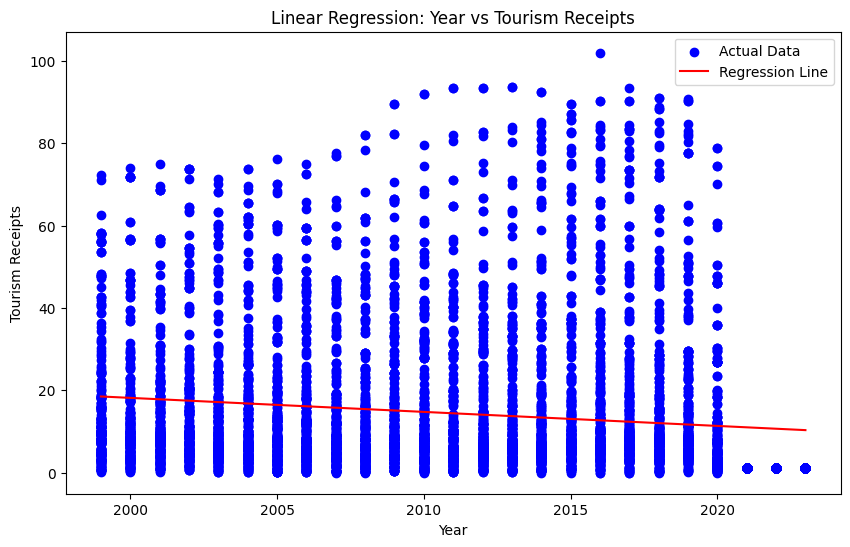

In [22]:
#here is the function, we simply pass in the x and y we want to plot.
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, LR.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Year vs Tourism Receipts')
plt.xlabel('Year')
plt.ylabel('Tourism Receipts')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Example: Testing if countries with high tourism receipts have significantly different inflation rates
high_tourism = df[df['tourism_receipts'] > df['tourism_receipts'].median()]
low_tourism = df[df['tourism_receipts'] <= df['tourism_receipts'].median()]

# T-test for inflation rates between high and low tourism countries
stat, p_value = ttest_ind(high_tourism['inflation'].dropna(), low_tourism['inflation'].dropna())
print(f"T-statistic: {stat}, P-value: {p_value}")


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predict tourism receipts
predicted_tourism_receipts_lr = lr_model.predict(X)

# Evaluate the model
mae_lr = mean_absolute_error(y, predicted_tourism_receipts_lr)
mse_lr = mean_squared_error(y, predicted_tourism_receipts_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}")

Linear Regression - MAE: 12.140725274564643, MSE: 298.8618250633781
